# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Import dependencies

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from api_keys import weather_api_key
from scipy.stats import linregress

### Import API Keys

## Generate Cities List

Generate a list of unique cities based on a random latitude and longitude and using citypy library

In [2]:
# Size of the list of cities
num_cities = 600
latitude_max = 90
longitude_max = 180

cities_list = []
country_list = []
lat_list = []
lng_list = []


while len(cities_list) < num_cities:
    
    # Generate a random latitude using numpy random array multiplied by 90 that is the maximum for latitude
    # and multiple by a random +1 or -1 to give the North or South from Equator
    lat_random = ((latitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Generate a random longitude using numpy random array multiplied by 180 that is the maximum for longitude
    # and multiple by a random +1 or -1 to give the East or West from Greenwich
    lon_random = ((longitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Create a list of cities based on the random coordinates and using the citypy library
    city = citipy.nearest_city(lat_random[0][0], lon_random[0][0])
    new_city = city.city_name.title()
    new_city_country = city.country_code.upper()
    

    # Logical test to verify if the city is already include in the list or not
    if new_city not in cities_list:
        cities_list.append(new_city)
        country_list.append(new_city_country)
        lat_list.append(lat_random[0][0])
        lng_list.append(lon_random[0][0])

        
print(f'List of cities has {len(cities_list)} cities.')

List of cities has 500 cities.


In [3]:
# Create a dataframe with the random latitude and longitude

cities_df = pd.DataFrame({'City':cities_list,
                          'Lat':lat_list,
                          'Lng':lng_list,
                          'Max Temp':'',
                          'Humidity':'',
                          'Cloudiness':'',
                          'Wind Speed':'',
                          'Country':country_list,
                          'Date':''})

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beringovskiy,58.625762,176.203495,,,,,RU,
1,Aklavik,69.782282,-141.846280,,,,,CA,
2,Cape Town,-69.301637,-13.693385,,,,,ZA,
3,Podgornoye,57.075690,82.834095,,,,,RU,
4,Kloulklubed,7.161880,134.039925,,,,,PW,
...,...,...,...,...,...,...,...,...,...
495,Coihaique,-46.032328,-72.121083,,,,,CL,
496,Ust-Barguzin,53.449393,108.892341,,,,,RU,
497,Urrao,6.097277,-76.396075,,,,,CO,
498,Jishou,28.644987,110.160481,,,,,CN,


In [4]:
# Double check if the list only has unique cities
print(f"The list of cities has {len(cities_df['City'].unique())} unique cities.")


The list of cities has 500 unique cities.


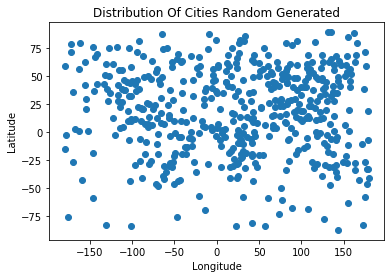

In [5]:
# Generate a scatterplot of the random coordinates.
# Note that coordinates looks to be evenly distributed.
# since the numpy random number distribution has uniform distribution

plt.scatter(x=cities_df['Lng'], y=cities_df['Lat'])
plt.title('distribution of cities random generated'.title())
plt.xlabel('Longitude')
plt.ylabel('Latitude');

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
hum = []
max_temp = []
cloudiness = []
wind_speed = []
time_data_calculation = []
n = 0

# Loop through the list of cities and perform a request for data on each
for city in cities_df['City']:
    response = requests.get(query_url + city).json()


    # Handle exception in case of city data not available in the API
    try:
        print(f"Processing Record {n} of {len(cities_df['City'])} | {city}")
        hum.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        time_data_calculation.append(response['dt'])
    except KeyError:
        print(f"City {city} not found. Skipping...")
        hum.append(np.nan)
        max_temp.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        time_data_calculation.append(np.nan)
    
    n += 1

    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Processing Record 0 of 500 | Beringovskiy
Processing Record 1 of 500 | Aklavik
Processing Record 2 of 500 | Cape Town
Processing Record 3 of 500 | Podgornoye
Processing Record 4 of 500 | Kloulklubed
Processing Record 5 of 500 | Norman Wells
Processing Record 6 of 500 | Bluff
Processing Record 7 of 500 | Hobart
Processing Record 8 of 500 | Biak
Processing Record 9 of 500 | Bulawayo
Processing Record 10 of 500 | Punta Arenas
Processing Record 11 of 500 | Tuatapere
Processing Record 12 of 500 | Mataura
Processing Record 13 of 500 | Mughal Sarai
Processing Record 14 of 500 | Bredasdorp
Processing Record 15 of 500 | Touros
Processing Record 16 of 500 | East London
Processing Record 17 of 500 | Hermanus
Processing Record 18 of 500 | Cidreira
Processing Record 19 of 500 | Half Moon Bay
Processing Record 20 of 500 | Saskylakh
Processing Record 21 of 500 | Attawapiskat
City Attawapiskat not found. Skipping...
Processing Record 22 of 500 | Ushuaia
Processing Record 23 of 500 | Carnarvon
Processi

Processing Record 191 of 500 | Port Blair
Processing Record 192 of 500 | Atambua
Processing Record 193 of 500 | Khatanga
Processing Record 194 of 500 | Pimentel
Processing Record 195 of 500 | Saint George
Processing Record 196 of 500 | Ayan
Processing Record 197 of 500 | Esperance
Processing Record 198 of 500 | Toliary
City Toliary not found. Skipping...
Processing Record 199 of 500 | Kaeo
Processing Record 200 of 500 | Shieli
Processing Record 201 of 500 | Qaanaaq
Processing Record 202 of 500 | Rapid Valley
Processing Record 203 of 500 | Mathathane
Processing Record 204 of 500 | Presque Isle
Processing Record 205 of 500 | Manitouwadge
Processing Record 206 of 500 | Key Largo
Processing Record 207 of 500 | Halalo
City Halalo not found. Skipping...
Processing Record 208 of 500 | Khromtau
Processing Record 209 of 500 | Conselheiro Pena
Processing Record 210 of 500 | San Diego
Processing Record 211 of 500 | Iqaluit
Processing Record 212 of 500 | Faanui
Processing Record 213 of 500 | Ahuim

Processing Record 380 of 500 | Hirara
Processing Record 381 of 500 | Emborion
Processing Record 382 of 500 | Ozinki
Processing Record 383 of 500 | Ningan
City Ningan not found. Skipping...
Processing Record 384 of 500 | Los Algarrobos
Processing Record 385 of 500 | Danielskuil
Processing Record 386 of 500 | Monte San Pietro
Processing Record 387 of 500 | Colares
Processing Record 388 of 500 | Gaspe
Processing Record 389 of 500 | Mtambile
Processing Record 390 of 500 | Tias
Processing Record 391 of 500 | Portland
Processing Record 392 of 500 | Deputatskiy
Processing Record 393 of 500 | Oranjestad
Processing Record 394 of 500 | Biltine
Processing Record 395 of 500 | Veseloyarsk
Processing Record 396 of 500 | Karlskoga
Processing Record 397 of 500 | San Patricio
Processing Record 398 of 500 | Esso
Processing Record 399 of 500 | Santander
Processing Record 400 of 500 | Fuyu
Processing Record 401 of 500 | Namibe
Processing Record 402 of 500 | Lerwick
Processing Record 403 of 500 | Longyearb

In [7]:
# Update the dataframe with the data colected from the API for Max Temp, Humidity, Cloudiness, Wind Speed, Date
cities_df['Max Temp'] = max_temp
cities_df['Humidity'] = hum
cities_df['Cloudiness'] = cloudiness
cities_df['Wind Speed'] = wind_speed
cities_df['Date'] = time_data_calculation

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df.to_csv('data/city_weather.csv')

In [9]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beringovskiy,58.625762,176.203495,47.68,78.0,95.0,19.66,RU,1.599890e+09
1,Aklavik,69.782282,-141.846280,35.60,93.0,90.0,13.87,CA,1.599890e+09
2,Cape Town,-69.301637,-13.693385,57.20,87.0,84.0,2.24,ZA,1.599890e+09
3,Podgornoye,57.075690,82.834095,53.60,58.0,31.0,6.71,RU,1.599890e+09
4,Kloulklubed,7.161880,134.039925,82.40,83.0,90.0,8.05,PW,1.599890e+09
...,...,...,...,...,...,...,...,...,...
495,Coihaique,-46.032328,-72.121083,37.40,86.0,75.0,4.70,CL,1.599891e+09
496,Ust-Barguzin,53.449393,108.892341,59.81,82.0,100.0,5.82,RU,1.599891e+09
497,Urrao,6.097277,-76.396075,55.00,97.0,100.0,1.48,CO,1.599891e+09
498,Jishou,28.644987,110.160481,69.42,89.0,100.0,5.41,CN,1.599891e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
filter_hum = cities_df['Humidity'].loc[cities_df['Humidity'] > 100]
filter_hum

Series([], Name: Humidity, dtype: float64)

In [11]:
#  Get the indices of cities that have humidity over 100%.
indexes_hum = filter_hum.keys()
indexes_hum

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df
clean_city_data.drop(clean_city_data.iloc[indexes_hum].index, inplace=True)

# Drop NA values inserted to handle missing values
clean_city_data.dropna(inplace=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beringovskiy,58.625762,176.203495,47.68,78.0,95.0,19.66,RU,1.599890e+09
1,Aklavik,69.782282,-141.846280,35.60,93.0,90.0,13.87,CA,1.599890e+09
2,Cape Town,-69.301637,-13.693385,57.20,87.0,84.0,2.24,ZA,1.599890e+09
3,Podgornoye,57.075690,82.834095,53.60,58.0,31.0,6.71,RU,1.599890e+09
4,Kloulklubed,7.161880,134.039925,82.40,83.0,90.0,8.05,PW,1.599890e+09
...,...,...,...,...,...,...,...,...,...
495,Coihaique,-46.032328,-72.121083,37.40,86.0,75.0,4.70,CL,1.599891e+09
496,Ust-Barguzin,53.449393,108.892341,59.81,82.0,100.0,5.82,RU,1.599891e+09
497,Urrao,6.097277,-76.396075,55.00,97.0,100.0,1.48,CO,1.599891e+09
498,Jishou,28.644987,110.160481,69.42,89.0,100.0,5.41,CN,1.599891e+09


In [13]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,4.590000e+02
mean,17.242387,21.543984,66.845599,68.816993,49.464052,7.828867,1.599891e+09
std,38.457350,93.327956,15.238357,21.521627,38.176394,5.411265,7.193641e+01
min,-87.181168,-178.872682,26.220000,1.000000,0.000000,0.070000,1.599890e+09
25%,-8.106223,-56.597324,55.000000,56.000000,8.000000,3.925000,1.599891e+09
50%,21.059907,27.275407,68.000000,74.000000,42.000000,6.690000,1.599891e+09
75%,47.889946,104.690194,78.800000,86.000000,90.000000,10.290000,1.599891e+09
max,88.736579,179.796558,102.510000,100.000000,100.000000,34.230000,1.599891e+09


In [14]:
# Convert the time_data_calculation
date_rec = pd.to_datetime(clean_city_data['Date'], unit='s')
# str(date_rec[1])[:-9]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

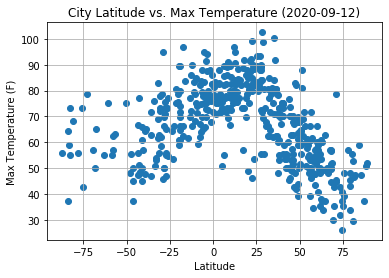

In [62]:
# Plot Latitude vs. Temperature
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Max Temp'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
plt.savefig('data/Fig_1_Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

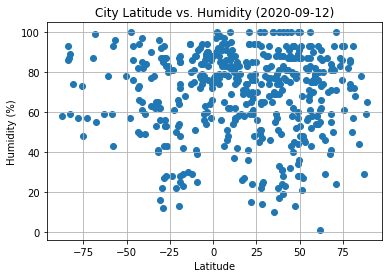

In [63]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Humidity'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
plt.savefig('data/Fig_2_Lat_vs_Hum.png')

## Latitude vs. Cloudiness Plot

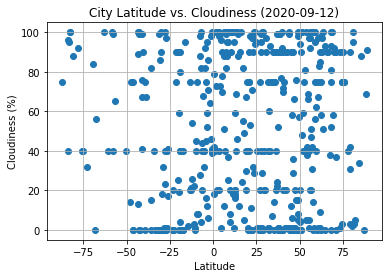

In [64]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Cloudiness'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
plt.savefig('data/Fig_3_Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

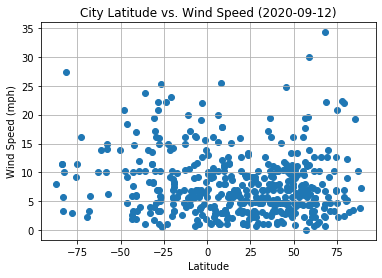

In [65]:
# Plot Latitude vs. Humidity
plt.scatter(x=clean_city_data['Lat'], y=cities_df['Wind Speed'])
plt.grid(True)
plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
plt.savefig('data/Fig_4_Lat_vs_Wind.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [66]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>0])
y_values = np.array(clean_city_data['Max Temp'].loc[clean_city_data['Lat']>0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.5503181391569135


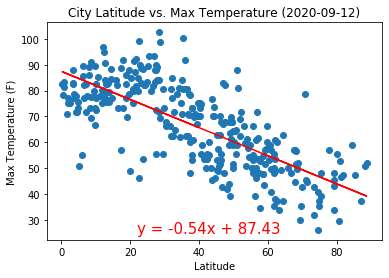

In [67]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 25), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [68]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Max Temp'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.27827924299357687


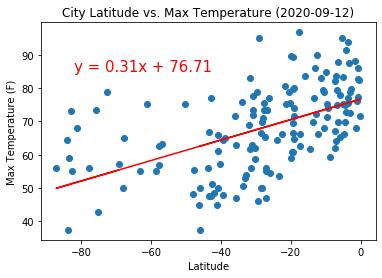

In [69]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 85), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [70]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>0])
y_values = np.array(clean_city_data['Humidity'].loc[clean_city_data['Lat']>0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.008289921544018504


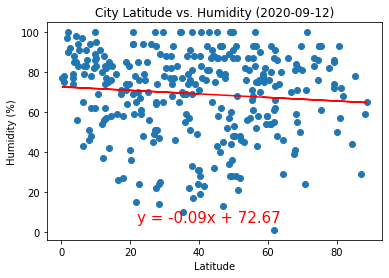

In [71]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 5), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [72]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Humidity'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.0005012226942282192


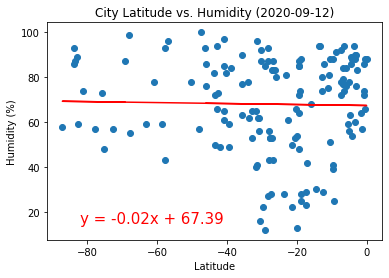

In [73]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 15), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [74]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>0])
y_values = np.array(clean_city_data['Cloudiness'].loc[clean_city_data['Lat']>0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.004215807953098


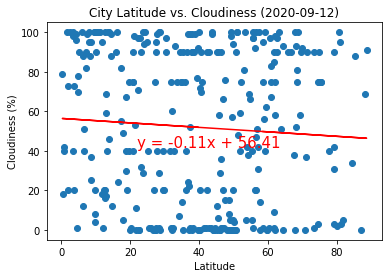

In [75]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 42), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [76]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Cloudiness'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.030365677779373244


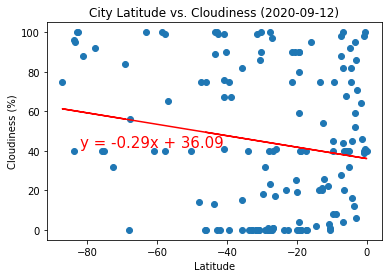

In [77]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-82, 42), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [78]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']>0])
y_values = np.array(clean_city_data['Wind Speed'].loc[clean_city_data['Lat']>0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.009697720010209122


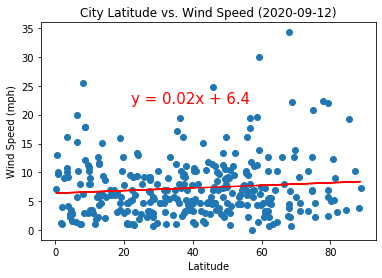

In [79]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 22), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [80]:
x_values = np.array(clean_city_data['Lat'].loc[clean_city_data['Lat']<0])
y_values = np.array(clean_city_data['Wind Speed'].loc[clean_city_data['Lat']<0])

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.011461808394775782


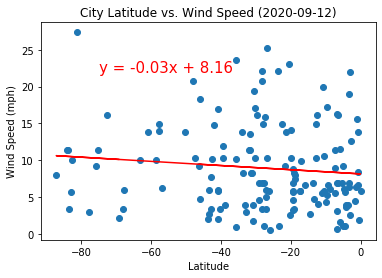

In [81]:
# plt.figure(figsize=(15,6))

plt.scatter(x=x_values, y=y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-75, 22), fontsize=15, color="red")


plt.title('distribution of cities random generated'.title())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({str(date_rec[1])[:-9]})");
print(f"The r-squared is: {rvalue**2}")
plt.show()